In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [70]:
df=pd.read_csv("adult_data_formatted.csv")
df.head(5)

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0,7
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0,9
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1,12
3,3,44,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1,10
4,5,34,Private,Never-married,Other-service,White,Male,0,0,30,United-States,0,6


# Describing data

In [71]:
df.describe()

,Unnamed: 0,age,capital-gain,capital-loss,hours-per-week,income,education-num
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,24433.151563,38.547941,1101.430344,88.595418,40.938017,0.247844,10.118460
std,14092.966862,13.217870,7506.430084,404.956092,12.007508,0.431766,2.552881
min,0.000000,17.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,12206.250000,28.000000,0.000000,0.000000,40.000000,0.000000,9.000000
50%,24470.000000,37.000000,0.000000,0.000000,40.000000,0.000000,10.000000
75%,36629.750000,47.000000,0.000000,0.000000,45.000000,0.000000,13.000000
max,48841.000000,90.000000,99999.000000,4356.000000,99.000000,1.000000,16.000000


In [72]:
df.shape

(45222, 13)

In [73]:
df.nunique()

Unnamed: 0        45222
age                  74
workclass             7
marital-status        7
occupation           14
race                  5
gender                2
capital-gain        121
capital-loss         97
hours-per-week       96
native-country       41
income                2
education-num        16
dtype: int64

# Attributes

Age:Continuous

In [74]:
print(df["age"].min(),df["age"].max())

17 90


Workclass:Discrete

In [75]:
print(df["workclass"].unique())

['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


Martital Status:Discrete

In [76]:
print(df['marital-status'].unique())

['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


Occupation: Categorical

In [77]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

Race:Categorical

In [78]:
df["race"].unique()

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

Gender: Categorical,Discrete [M, F]

In [79]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

Capital Gain and Capital loss : Continuous

In [80]:
df['capital-gain'].min(),df['capital-gain'].max()

(0, 99999)

In [81]:
df['capital-loss'].min(),df['capital-loss'].max()

(0, 4356)

Hours per Week: Quantitative Continuous

In [82]:
df['hours-per-week'].min(),df['hours-per-week'].max()

(1, 99)

Native Country : Categorical

In [83]:
df['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

Income: Prediction [0, 1]

# Encoding categorical values

income distribution is encoded as:-
1.>50k 
0.<50k

gender is encoded as :
0.female
1.male

In [84]:
df['gender_numeric'] = np.where(df['gender'] == 'Male', 1, np.where(df['gender'] == 'Female', 0, df['gender']))
df.head(5)

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,gender_numeric
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0,7,1
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0,9,1
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1,12,1
3,3,44,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1,10,1
4,5,34,Private,Never-married,Other-service,White,Male,0,0,30,United-States,0,6,1


In [85]:
df['marital-status'].replace(['Married-civ-spouse'], 'Married', inplace=True)
df['marital-status'].replace('Never-married', 'Not-married', inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated', inplace=True)
df['marital-status'].replace(['Widowed'], 'Separated', inplace=True)
df['marital-status'].replace(['Separated'], 'Separated', inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'Not-married', inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married', inplace=True)
df['marital-status'].unique()

array(['Not-married', 'Married', 'Separated'], dtype=object)

In [129]:
df.workclass = df.workclass.replace({'Self-emp-not-inc': 'Self-emp','Self-emp-inc': 'Self-emp','Local-gov': 'Gov','Federal-gov': 'Gov','State-gov': 'Gov'})
df.workclass.unique()

array(['Private', 'Gov', 'Self-emp', 'Without-pay'], dtype=object)

In [87]:
df.drop(df.columns[0], axis=1, inplace=True)

In [89]:
del(df["gender"])

In [90]:
df.head()

,age,workclass,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,gender_numeric
0,25,Private,Not-married,Machine-op-inspct,Black,0,0,40,United-States,0,7,1
1,38,Private,Married,Farming-fishing,White,0,0,50,United-States,0,9,1
2,28,Gov,Married,Protective-serv,White,0,0,40,United-States,1,12,1
3,44,Private,Married,Machine-op-inspct,Black,7688,0,40,United-States,1,10,1
4,34,Private,Not-married,Other-service,White,0,0,30,United-States,0,6,1


# Univariate and Bivariate Analysis

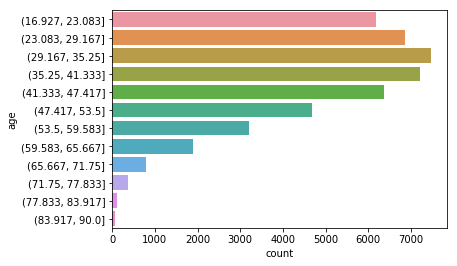

In [106]:
temp = pd.DataFrame()
temp['age'] = pd.cut(df['age'],12)
sns.countplot(y = 'age', data=temp)

It is depicted from the above analysis that the majority of people in the dataset belong to age group 20years to 45years.

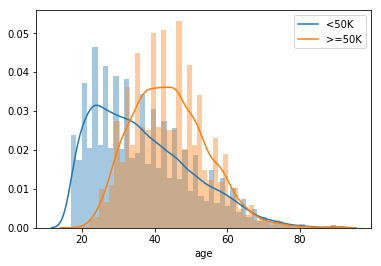

In [112]:
sns.distplot(df[df['income'] ==0]['age'], kde_kws={"label": "<50K"})
sns.distplot(df[df['income'] == 1]['age'], kde_kws={"label": ">=50K"})

Thus majority of earners in between 20-45,Also people earning>=50k mostly lies in age category above 40

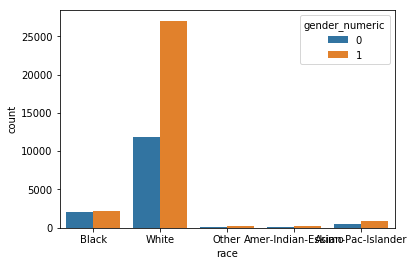

In [114]:
x, y, hue = "race", "count", "gender_numeric"
sns.countplot(x=x, hue=hue, data=df)

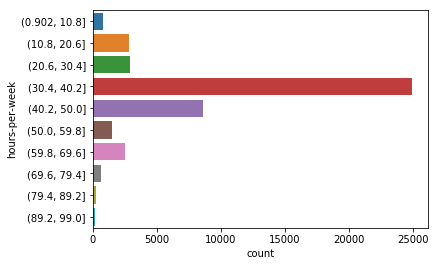

In [116]:
temp['hours-per-week'] = pd.cut(df['hours-per-week'], 10)
sns.countplot(y="hours-per-week", data=temp)

the above analysis shows that majority of the working class dedicates arounf 30 to 40 hours per week to their work, which can be roughly estimated to be 7-8 hrs a day for 5 working days.

(20, 60)

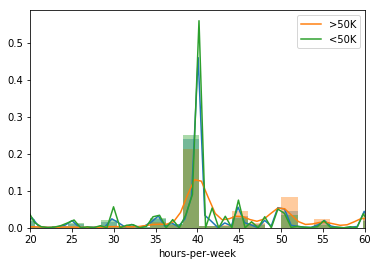

In [121]:
sns.distplot(df['hours-per-week']);
sns.distplot(df[df['income'] == 1]['hours-per-week'], kde_kws={"label": ">50K"})
sns.distplot(df[df['income'] == 0]['hours-per-week'],kde_kws={"label": "<50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

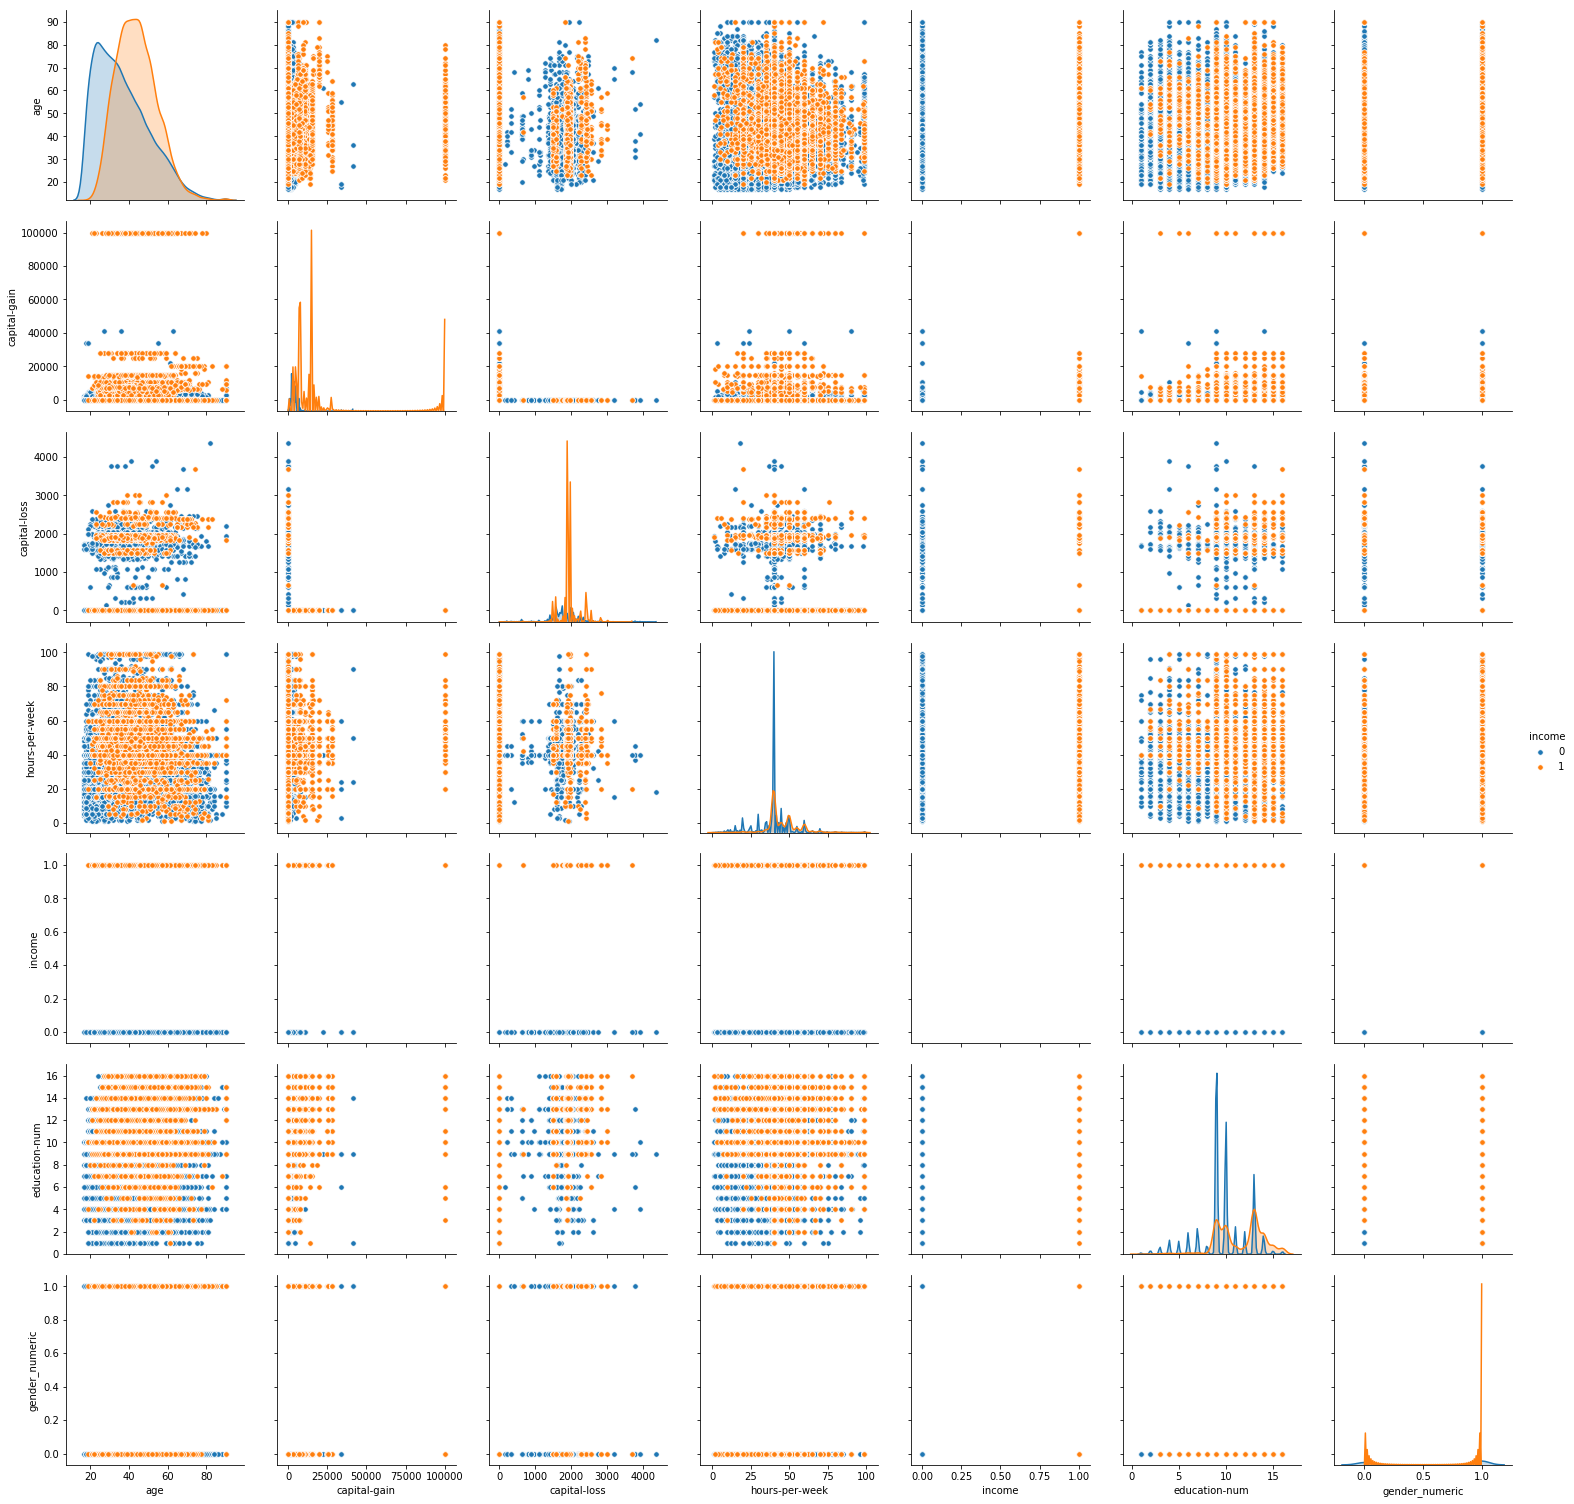

In [127]:
sns.pairplot(df, hue = 'income', height=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=30))

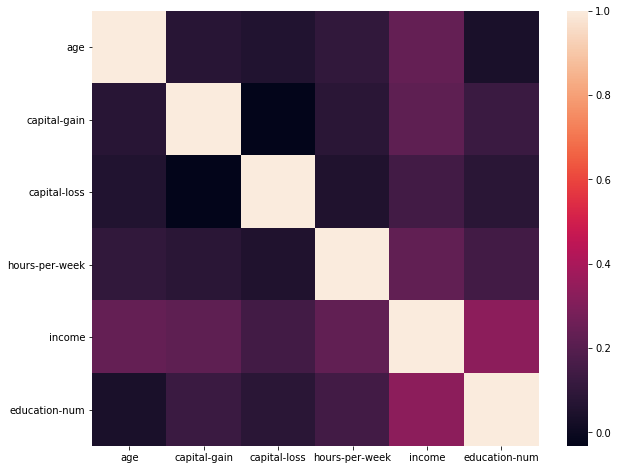

In [135]:
ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)